In [10]:
from core import models 
import utils 
from core import data
import matplotlib.pyplot as plt

In [4]:
# check the testloader as well
data_dir = "../../different_cards"
txt_fname = "data.txt"
data_handler = data.CardTestDataHandler(data_dir, txt_fname)

In [8]:
testloader = data_handler.get_testloader(batch_size=9)

In [7]:
# load model checkpoint 
ckpt = utils.load_ckpt("../../classifier_test/model.ckpt", "cpu")
model = models.ConvNet()
utils.load_ckpt2module(ckpt, model, "model")

Nothing removed from the ckpt, great!
Module in ckpt was trained 9 epochs.


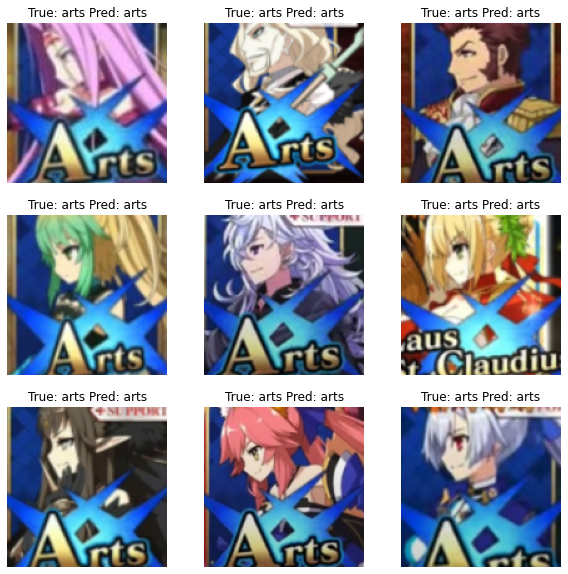

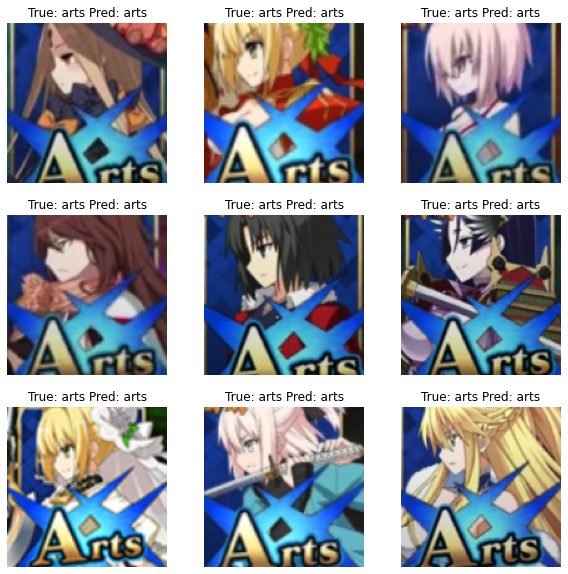

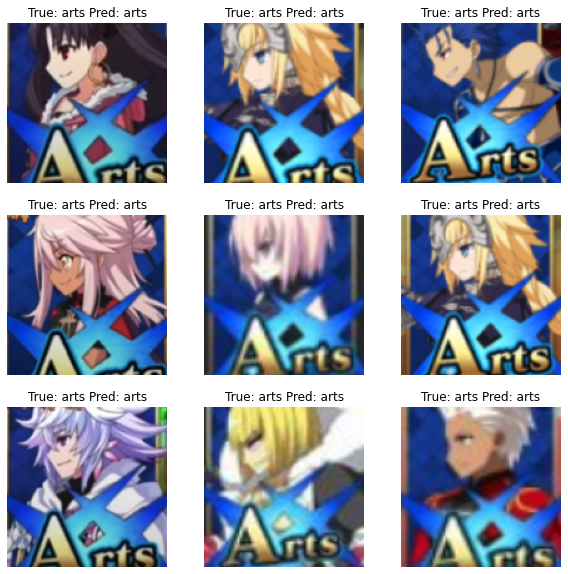

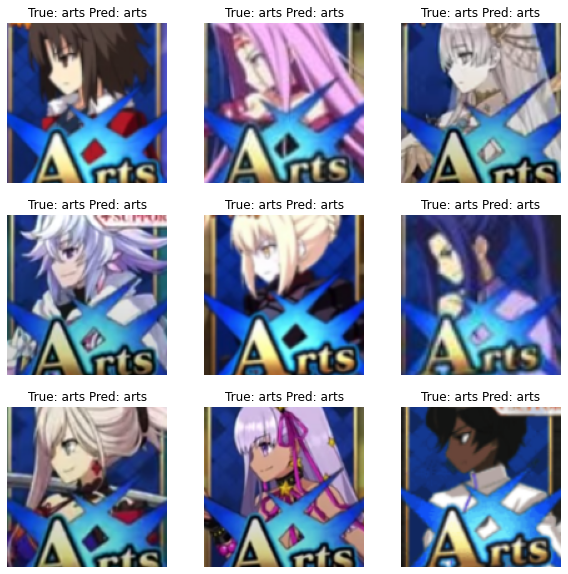

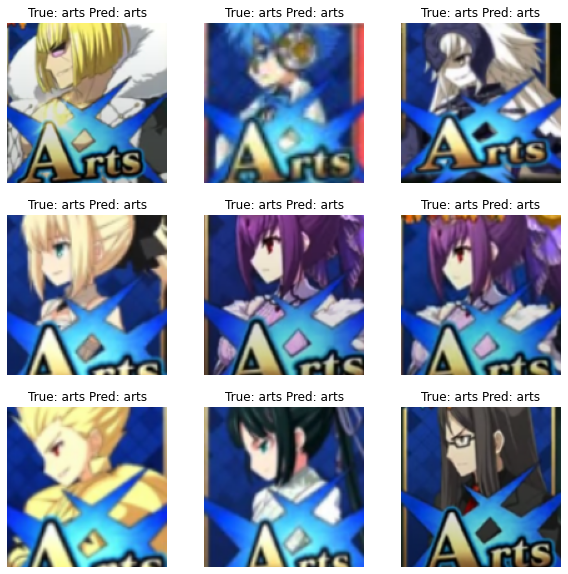

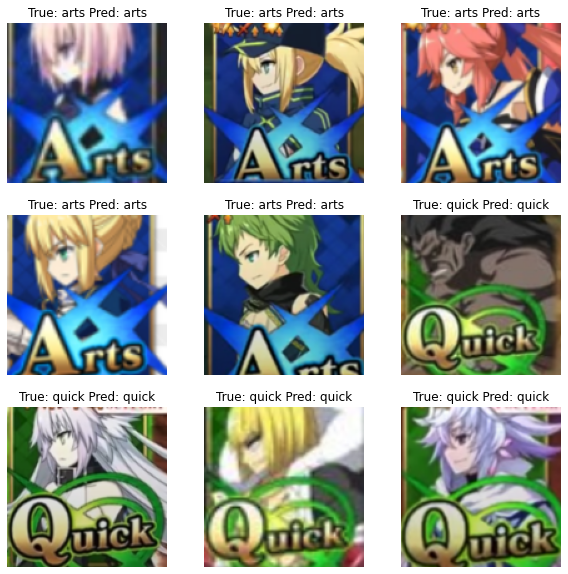

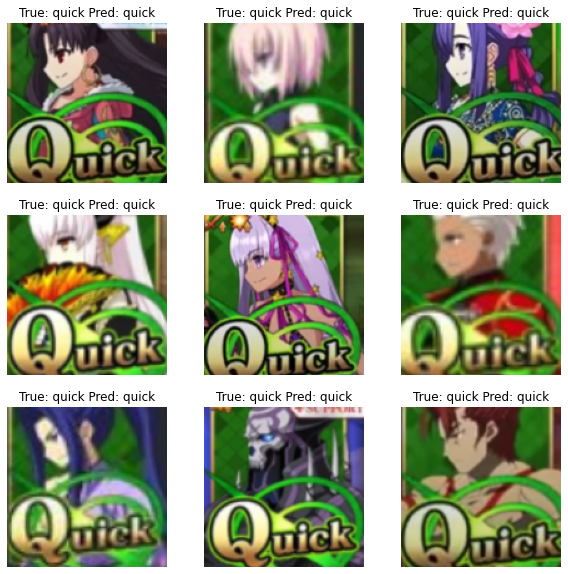

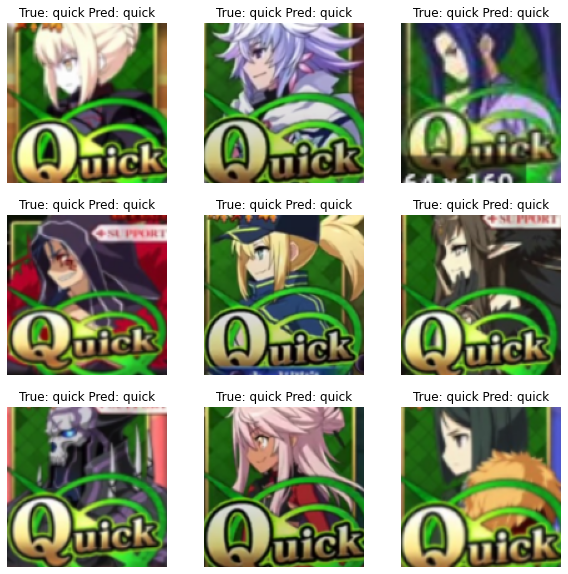

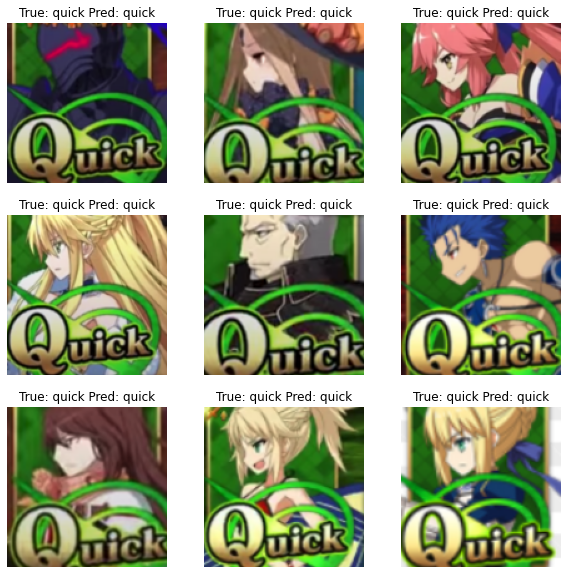

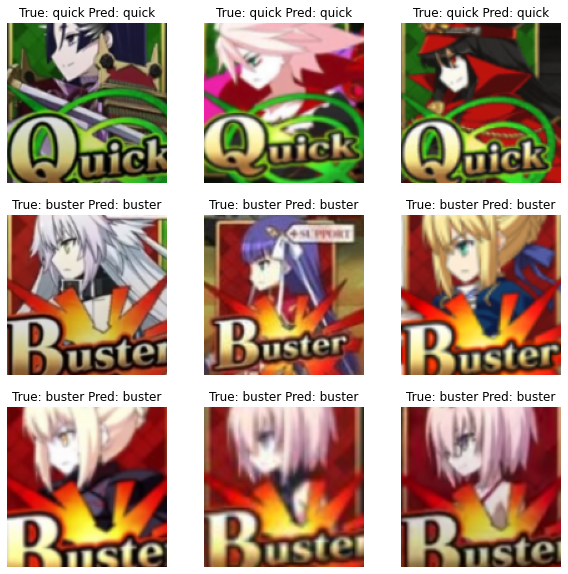

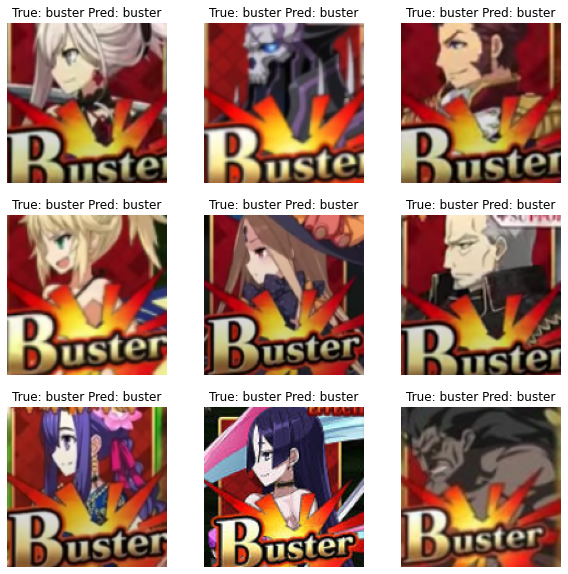

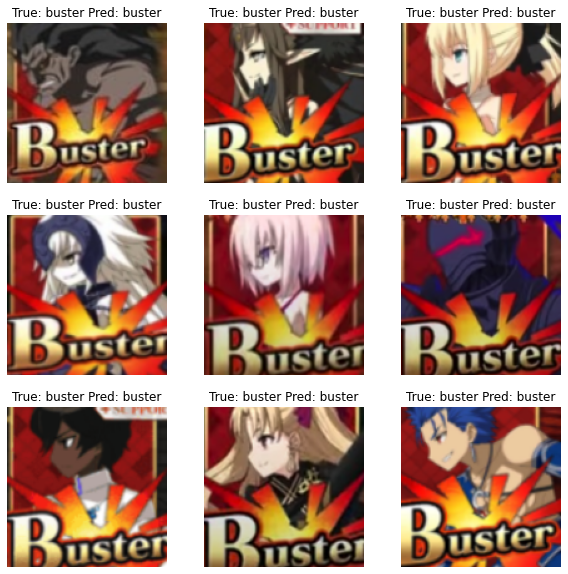

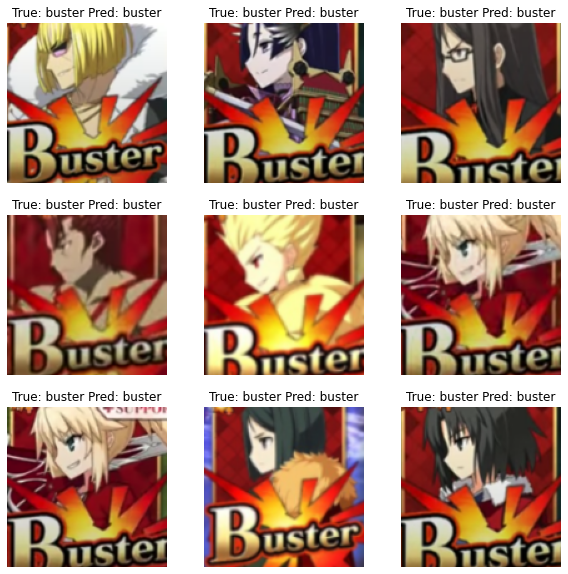

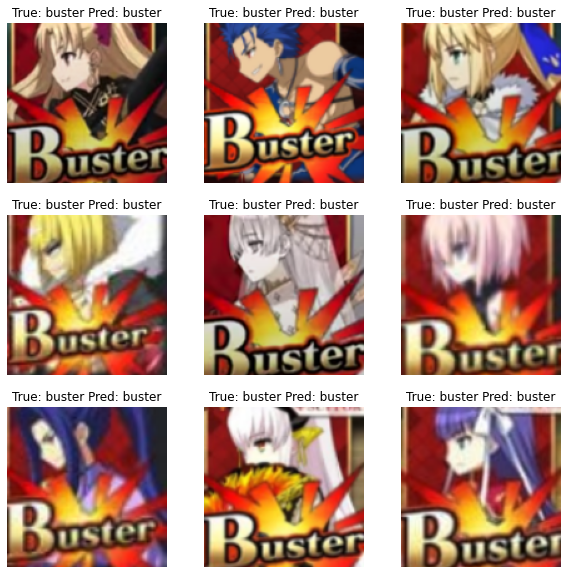

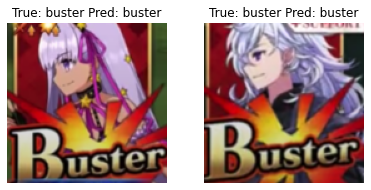

In [16]:
%matplotlib inline 
class_names = {0:"arts", 1:"buster", 2:"quick"}
model.eval()

wrong_preds = 0
for img, disp_img, labels in testloader:
    output = model(img)
    preds = output.max(dim=1)[1].cpu().numpy()
    plt.figure(figsize=(10, 10))
    for i in range(img.shape[0]):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(disp_img[i])
        if labels[i] != preds[i]:
            wrong_preds += 1 
        plt.title("True: {} Pred: {}".format(class_names[labels[i].item()], class_names[preds[i].item()]))
        plt.axis("off")

In [17]:
wrong_preds

0